In [44]:
import phonopy
# Import the CellConstructor library to plot the dispersion
import cellconstructor as CC, cellconstructor.Phonons
import cellconstructor.ForceTensor
# Import the numerical libraries and those for plotting
import numpy as np
import matplotlib.pyplot as plt
import sys, os
from phonopy.phonon.animation import write_animation

In [74]:
KBiO3 = phonopy.load(r'phonopyParamsKBiO3.yaml')
KBiO3.save(settings={'force_constants': True})


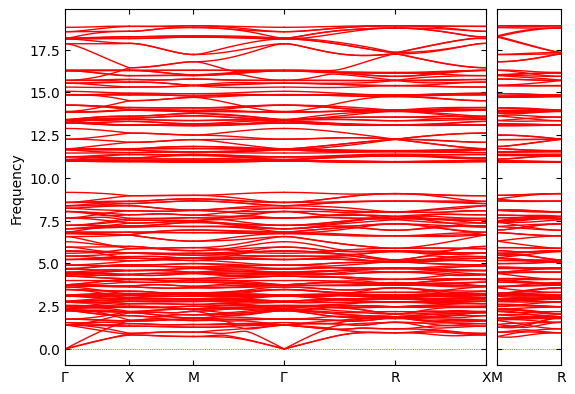

In [46]:
from phonopy.phonon.band_structure import get_band_qpoints_and_path_connections
path = [[[0, 0, 0], [0, 0.5, 0], [0.5, 0.5, 0],[0,0,0],[0.5,0.5,0.5],[0,0.5,0]],
        [[0.5,0.5,0],[0.5,0.5,0.5]]]
labels = ["$\\Gamma$", "X", "M", "$\\Gamma$", "R", "X", "M", "R"]
qpoints, connections = get_band_qpoints_and_path_connections(path, npoints=51)
KBiO3.run_band_structure(qpoints, path_connections=connections, labels=labels)
KBiO3.plot_band_structure().show()

In [75]:
import cellconstructor as CC
import cellconstructor.Phonons
import cellconstructor.Manipulate

# Load a dynamical matrix that represent an ice structure (at gamma)
dyn = CC.Phonons.Phonons()
dyn.load_phonopy("phonopy_params.yaml")

#dyn.save_qe("new_dyn")


# We dyagonalize the dynamical matrix
w, p = dyn.DiagonalizeSupercell()
# We pick the hardest mode
mode_id = 83

# We must specify the amplitude of the vibrations (in A)
amplitude = 0.8 #A
# The time steps between two frams (in Femtoseconds)
dt = 0.5
# The total number of time steps
N_t = 100

# Save the video of the trajectory in a xyz file.
CC.Manipulate.GenerateXYZVideoOfVibrations(dyn, "vibration.xyz", mode_id, amplitude, dt, N_t)

/home/investigador/.local/lib/python3.10/site-packages/cellconstructor/Phonons.py:1380: UserWarning: This subroutine is not tested yet, use it with care.
  warnings.warn("This subroutine is not tested yet, use it with care.")


In [51]:
qpoint = [0,0,0]
anime_type = 'jmol'
band_index=3
amplitude=5
num_div=None
shift=None
factor=1
filename=None#'KBiO3.ascii'



write_animation(KBiO3.dynamical_matrix,q_point=qpoint,anime_type=anime_type, 
                band_index=band_index, amplitude=amplitude, num_div=num_div, shift=shift,
                factor=factor, filename=filename)

'anime.xyz_jmol'